   # **LeNet-5 implementation**

I've implemented the LeNet-5 CNN architecture by Yann LeChun, Leon Bottou, Yoshua Bengio, and Patrick Haffner on this Sign Language MNIST dataset. The model includes Convolution layers, Max pooling layers and fully connected layers. Find the research paper [here](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

The dataset includes 28x28 sized grayscale pictures of sign language representations. The dataset has 24 classes in total accounting for the 24 alphabets in the American english literature excluding J and Z because they require motion.

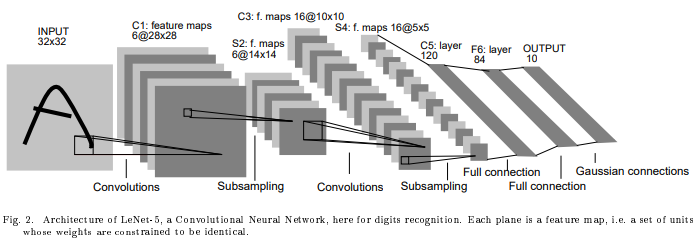

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

training_images = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
testing_images = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
print(training_images.head())

In [ ]:
print(testing_images.head())

In [ ]:
training_images_x = training_images.drop('label', axis=1)
training_images_x.shape

In [ ]:
testing_images_x = testing_images.drop('label', axis=1)
print(testing_images_x.shape)

In [ ]:
training_images_x = tf.reshape(training_images_x,[27455,28,28,1])
testing_images_x = tf.reshape(testing_images_x,[7172,28,28,1])

In [ ]:
training_images_x.shape

In [ ]:
testing_images_x.shape

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig=plt.figure(figsize=(15, 15))
col = 5
rows = 5
print('Training data: \n')
for i in range(1, col*rows +1):
    fig.add_subplot(rows, col, i)
    plt.imshow(tf.reshape(training_images_x[i],[28,28]))
plt.show()

In [ ]:
fig=plt.figure(figsize=(15, 15))
col = 5
rows = 5
print('Testing data: \n')
for i in range(1, col*rows +1):
    fig.add_subplot(rows, col, i)
    plt.imshow(tf.reshape(testing_images_x[i],[28,28]))
plt.show()

In [ ]:
training_images_y = training_images['label']
testing_images_y = testing_images['label']
training_images_y.shape

In [ ]:
# To prevent dimensions of the form (m,)
# instead we want of the form (m,n)

training_images_y.to_numpy()
training_images_y = pd.DataFrame(training_images_y)
print(training_images_y.shape)

In [ ]:
testing_images_y.to_numpy()
testing_images_y = pd.DataFrame(testing_images_y)
print(testing_images_y.shape)

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# One vs all classification
label_binrizer = LabelBinarizer()
training_images_y = label_binrizer.fit_transform(training_images_y)

In [ ]:
training_images_x = training_images_x/255
testing_images_x = testing_images_x/255

In [ ]:
def lenet5():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(6,(5,5),activation=tf.nn.relu, input_shape = (28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16,(5,5),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation = tf.nn.relu),
        tf.keras.layers.Dense(84, activation = tf.nn.relu),
        tf.keras.layers.Dense(24, activation = tf.nn.softmax), # 24 units because there are 24 classes in the dataset
    ])

    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

    history = model.fit(
        training_images_x, training_images_y, epochs = 5,
    )
    print(model.summary())
    return model

In [ ]:
model = lenet5()
from sklearn.metrics import accuracy_score
y_pred = model.predict(testing_images_x)

In [ ]:
testing_images_y = label_binrizer.fit_transform(testing_images_y)
print('LeNet-5 test accuracy: ',accuracy_score(testing_images_y, y_pred.round()))